### All functions

In [506]:
class changeTypes:
    
    '''
    
    This function drops unwanted colums + change dtypes of the columns we specify it to, 
    into numeric and categoricals
    
    '''
    
    import pandas as pd
    import numpy as np
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
    
    def dropAndChange(self, to_drop, numerics, categoricals):
        x = lambda a: pd.to_numeric(a, errors='coerce')
        y = lambda a: a.astype('category')
        changed_df = self.dataFrame.drop(to_drop, axis=1)
        for i in numerics:
            changed_df[i] = x(changed_df[i])
        for i in categoricals:
            changed_df[i] = y(changed_df[i])
        return changed_df  

In [793]:
class changeBad:
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        
    """
    
    This function changes all the bad values in the dataframe to normals as described below
        Temp - remove all <95, >104 
        SpO2 - <1 multiply by 100 
        MAP - 0 impute MAP >250 remove 
        RR - >60 remove 
        FiO2 - >1 divide by 100 
        PaO2 - <40, >400 
        PaCO2 - <15, >140 
        drop bicarb column 
        TLC <50, multiply by 1000 
        Platelets <10, multiply by 100000 
        PaO2 lower value 
        A-a remove column 
        Urine output 43 zero values
    
    """
    
    def change(self):
        self.Temperature[self[self.Temperature<95].index] = 98.4
        self.Temperature[self[self.Temperature>104].index] = 98.4
        self.SpO2[self[self.SpO2<=1].index] = (self.SpO2[self[self.SpO2<=1].index])*100
        self.SpO2[self[self.SpO2<40].index] = 98
        self.MAP[self[self.MAP<40].index] = 92
        self.MAP[self[self.MAP>300].index] = 92
        self.RR[self[self.RR>60].index] = 16
        self.FiO2[self[self.FiO2>1].index] = (self.FiO2[self[self.FiO2>1].index])/100
        self.FiO2[self[self.FiO2<0.21].index] = 0.21
        self.PaO2[self[self.PaO2>400].index] = 100
        self.PaO2[self[self.PaO2<40].index] = 100
        self.PaCO2[self[self.PaCO2>140].index] = 38
        self.PaCO2[self[self.PaCO2<15].index] = 38
        self.TLC[self[self.TLC<=50].index] = (self.TLC[self[self.TLC<=50].index])*1000
        self.TLC[self[self.TLC>200000].index] = 9000
        self.Platelets[self[self.Platelets<=10].index] = (self.Platelets[self[self.Platelets<=10].index])*100000
        self.Platelets[self[self.Platelets>2000000].index] = 220000
        self['Urine output'][self[self['Urine output']==0].index] = 1000
        self.GCS[self[self.GCS==2].index] = 3
        return self

In [676]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [536]:
class Impute:
    
    '''
    
    Imputes Na values with normal values
    
    '''
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        
    def impute(self, num_cols, cat):
        fillna_freq = lambda x:x.fillna(x.value_counts().index[0])
        
        for num in num_cols:
            self.dataFrame[num] = self.dataFrame[num].fillna(self.dataFrame[num].median())
            
        for i in categoricals:
            self.dataFrame[i] = fillna_freq(self.dataFrame[i])
            
        return self.dataFrame        

In [509]:
class Scale:
    
    '''
    
    Scales the numeric colums
    
    '''
    from sklearn import preprocessing
    from sklearn.preprocessing import StandardScaler as scaler
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        
    def scale(self, numerics):
        scaler = StandardScaler()

        df_scaled = self.dataFrame
        for col in numerics:
            df_scaled[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_scaled[col])))
        return df_scaled

In [510]:
class OHE:
    '''
    One hot encodes the input text
    '''
    import pandas as pd
    import numpy as np
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        
    def encode(self, targ_string):
        fin = pd.get_dummies(self.dataFrame.drop([targ_string], axis = 1), drop_first=True)
        targ = pd.get_dummies(self.dataFrame[targ_string].values, drop_first=True)
        return (fin, targ)

In [717]:
flatten = lambda l: [item for sublist in l for item in sublist]
class evaluate:
    
    def __init__(self, model):
        self.model = model
    
    def score(self, X, y):
        y_pred = self.predict_proba(X)[:,1]
        model_score = roc_auc_score(y, y_pred)
        # Finding confidence intervals
        n_bootstraps = 1000
        rng_seed = 42  # control reproducibility
        bootstrapped_scores = []
        rng = np.random.RandomState(rng_seed)
        for i in range(n_bootstraps):
            # bootstrap by sampling with replacement on the prediction indices
            indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
            score = roc_auc_score(y.values[indices], y_pred[indices])
            bootstrapped_scores.append(score)
        sorted_scores = np.array(bootstrapped_scores)
        sorted_scores.sort()
        # Computing the lower and upper bound of the 90% confidence interval
        # You can change the bounds percentiles to 0.025 and 0.975 to get
        # a 95% confidence interval instead.
        confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
        confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
        return (model_score, confidence_lower, confidence_upper)
    
    def scoreNN(self, X, y):
        y_pred = self.predict(X)
        model_score = roc_auc_score(y, y_pred)
        fpr, tpr, _ = roc_curve(y, y_pred)
        # Finding confidence intervals
        n_bootstraps = 1000
        rng_seed = 42  # control reproducibility
        bootstrapped_scores = []
        rng = np.random.RandomState(rng_seed)
        for i in range(n_bootstraps):
            # bootstrap by sampling with replacement on the prediction indices
            indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
            score = roc_auc_score(y.values[indices], y_pred[indices])
            bootstrapped_scores.append(score)
        sorted_scores = np.array(bootstrapped_scores)
        sorted_scores.sort()
        # Computing the lower and upper bound of the 90% confidence interval
        # You can change the bounds percentiles to 0.025 and 0.975 to get
        # a 95% confidence interval instead.
        confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
        confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
        #return (model_score, confidence_lower, confidence_upper)
        return (y, y_pred)
    
    def hoslem(self, X, y, rng=50):
        from scipy.stats import chi2
        
        y_pred = self.predict_proba(X)[:,1]
        # Finding optimal cut off - TRAIN SET DATA
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        cutoff = thresholds[np.argmax(tpr-fpr)]
        print("Optimal threshold is : {}".format(cutoff.round(3)))
        # Creating confusion matrix and calculating sensitivity and specificity
        pred_mort = (y_pred>cutoff)
        print(classification_report(y, (1*pred_mort)))
        # Creating hoshmer lemeshow
        hl_df = (pd.DataFrame(data={'actual':y.values.flatten(), 
                                    'prediction':y_pred})).sort_values('prediction')

        hl_df['score_decile'] = pd.qcut(hl_df['prediction'] + jitter(hl_df['prediction']), 4)
        obsevents_pos = hl_df['actual'].groupby(hl_df.score_decile).sum()
        obsevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - obsevents_pos
        expevents_pos = hl_df['prediction'].groupby(hl_df.score_decile).sum()
        expevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - expevents_pos
        hl = (((obsevents_pos - expevents_pos)**2/expevents_pos) + 
              ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
        print(hl)
        p_val = 1-chi2.cdf(hl, 2); print(p_val)
        print(obsevents_pos.values, expevents_pos.values)
        
    def hoslemNN(self, X, y, rng=100):
        y_pred = self.predict_proba(X); y_pred = flatten(y_pred);
        # Finding optimal cut off - TRAIN SET DATA
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        cutoff = thresholds[np.argmax(tpr-fpr)]
        print("Optimal threshold is : {}".format(cutoff.round(3)))
        # Creating confusion matrix and calculating sensitivity and specificity
        pred_mort = (y_pred>cutoff)
        print(classification_report(y, (1*pred_mort)))
        # Creating hoshmer lemeshow
        hl_df = (pd.DataFrame(data={'actual':y.values.flatten(), 
                                    'prediction':y_pred})).sort_values('prediction')

        hl_df['score_decile'] = pd.qcut(hl_df['prediction'], 4)
        obsevents_pos = hl_df['actual'].groupby(hl_df.score_decile).sum()
        obsevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - obsevents_pos
        expevents_pos = hl_df['prediction'].groupby(hl_df.score_decile).sum()
        expevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - expevents_pos
        hl = (((obsevents_pos - expevents_pos)**2/expevents_pos) + 
              ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
        print('Hoslem test value is {}'.format(hl))
        print(obsevents_pos.values, expevents_pos.values)
        print(((obsevents_pos - expevents_pos)**2/expevents_pos) + 
              ((obsevents_neg - expevents_neg)**2/expevents_neg))
        
        return (obsevents_pos.values, expevents_pos.values)
        

In [512]:
def scoreEval(targ, pred):
    
    from sklearn.metrics import roc_auc_score
    
    # Getting ROC
    print(roc_auc_score(targ, pred))
    # Getting 95% CI
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(pred) - 1, len(pred))
        if len(np.unique(targ[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        score = roc_auc_score(targ[indices], pred[indices])
        bootstrapped_scores.append(score)
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print(confidence_lower, confidence_upper)
    # Finding optimal cut off
    fpr, tpr, thresholds = roc_curve(targ, pred)
    cutoff = thresholds[np.argmax(tpr-fpr)]
    # Creating confusion matrix and calculating sensitivity and specificity
    pred_mort = (pred>cutoff)
    print(classification_report(targ, (1*pred_mort)))
    # Creating hoshmer lemeshow
    hl_df = (pd.DataFrame(data={'actual':targ, 
                                'prediction':pred})).sort_values('prediction')

    hl_df['score_decile'] = pd.qcut(hl_df['prediction']+jitter(hl_df['prediction']), 4)
    obsevents_pos = hl_df['actual'].groupby(hl_df.score_decile).sum()
    obsevents_neg = hl_df['actual'].groupby(hl_df.score_decile).count() - obsevents_pos
    expevents_pos = hl_df['prediction'].groupby(hl_df.score_decile).sum()
    expevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - expevents_pos
    hl = (((obsevents_pos - expevents_pos)**2/expevents_pos) + ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
    print(hl)
    print(obsevents_pos.values, expevents_pos.values)
    return (obsevents_pos.values, expevents_pos.values)

In [513]:
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

In [514]:
def plotHoslem(tot_fin):
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    print('Arranging Models...')
    # List of models
    models = [grid_sgb.best_estimator_, grid_gb.best_estimator_, 
              grid_brf.best_estimator_, grid_rf.best_estimator_, 
              grid_br.best_estimator_, grid_kn.best_estimator_, 
              gs_dtr.best_estimator_, gs_lr.best_estimator_, nn_model]

    # Dictionary of pipelines
    model_dict = {0: 'Stochastic Gradient Boost', 1: 'Gradient Boost', 2: 'RF with batch aggregation', 
                 3: 'Random Forest', 4: 'DT with Batch Aggregation', 5: 'K Nearest Neighbours', 6: 'DecisionTree', 
                 7: 'Logistic Regression', 8: 'Neural Network'}

    roc_ls = []; train_list =[]
    count_c = 0; count_r = 0
    fig, axs = plt.subplots(3, 3)
    hl_list = []
    
    print('Evaluating performance...')
    for idx, model in enumerate(models):
        t = []
        # Preparing Dataset
        print('Preparing dataset...')
        if (model_dict[idx] != 'Neural Network'):
            X_train = tot_fin.drop('Survival', axis=1)
            y_train = tot_fin['Survival']
        else:
            print('Preparing Neural Net data...')
            numerics = tot_fin.iloc[:,list(np.append(0, np.arange(3,24)))].columns
            df_nn_scaled = Scale(tot_fin).scale(numerics)
            # One hot encoding
            fin_nn, targ_nn = OHE(df_nn_scaled).encode('Survival')
            X_train = fin_nn.values
            y_train = targ_nn.values
        
        # Evaluating
        print('Evaluating...')
        if (model_dict[idx] != 'Neural Network'):
            print('\nEstimator: %s' % model_dict[idx])
            # Predict
            if (model_dict[idx] == 'Logistic Regression'):
                y_train_pred = model.predict_proba(X_train)[:, 1]
            else:
                y_train_pred = model.predict(X_train)
            # Creating hosmer lemeshow
            hl_df = (pd.DataFrame(data={'actual':y_train.values.flatten(), 
                                        'prediction':y_train_pred})).sort_values('prediction')

            hl_df['score_decile'] = pd.qcut(hl_df['prediction']+jitter(hl_df['prediction']), 4)
            obsevents_pos = hl_df['actual'].groupby(hl_df.score_decile).sum()
            obsevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - obsevents_pos
            expevents_pos = hl_df['prediction'].groupby(hl_df.score_decile).sum() +1
            expevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - expevents_pos +1
            hl = (((obsevents_pos - expevents_pos)**2/expevents_pos) + ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
            print(hl)
            p_val = 1-chi2.cdf(hl, 2); print(p_val)
            t.append((model_dict[idx], obsevents_pos.values, expevents_pos.values))
            hl_list.append(t)
            axis_x = obsevents_pos.values
            axis_y = expevents_pos.values
            t.append([axis_x, axis_y]); train_list.append(t)
             
        else:
            print('\nEstimator: %s' % model_dict[idx])
            # Predict
            y_train_pred = np.array(flatten(model.predict(X_train)))
            # Creating hosmer lemeshow
            hl_df = (pd.DataFrame(data={'actual':y_train.flatten(), 
                                        'prediction':y_train_pred})).sort_values('prediction')

            hl_df['score_decile'] = pd.qcut(hl_df['prediction']+jitter(hl_df['prediction']), 4)
            obsevents_pos = hl_df['actual'].groupby(hl_df.score_decile).sum()
            obsevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - obsevents_pos
            expevents_pos = hl_df['prediction'].groupby(hl_df.score_decile).sum() +1
            expevents_neg = hl_df['prediction'].groupby(hl_df.score_decile).count() - expevents_pos +1
            hl = (((obsevents_pos - expevents_pos)**2/expevents_pos) + ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
            print(hl)
            p_val = 1-chi2.cdf(hl, 2); print(p_val)
            t.append((model_dict[idx], obsevents_pos.values, expevents_pos.values))
            hl_list.append(t)
            axis_x = obsevents_pos.values
            axis_y = expevents_pos.values
            t.append([axis_x, axis_y]); train_list.append(t)
        
        print(axis_x, axis_y)
        # Plotting Hosmer Lemeshow
        axs[count_r, count_c].plot(axis_x,axis_y, color = 'black', marker='o', label='Model: {}'.format(round(hl, 1)))
        axs[count_r, count_c].plot([0, 50], [0, 50], lw=4, color='silver', linestyle='--')
        axs[count_r, count_c].set_title(model_dict[idx], fontsize = 10)
        axs[count_r, count_c].plot(ap_hoslem[0], ap_hoslem[1], color='grey', lw=2, marker='^', label='APACHE II: {}'.format(round(ap_hl,1)))
        axs[count_r, count_c].plot(tr_hoslem[0], tr_hoslem[1], color='grey', lw=2, marker='v', label='TropICS: {}'.format(round(tr_hl,1)))
        axs[count_r, count_c].legend(loc='upper left')
        for ax in axs.flat:
            ax.set(xlabel='Observed', ylabel='Expected')
        for ax in axs.flat:
            ax.label_outer()

        count_c +=1
        if (count_c>2):
            count_r +=1
            count_c = 0

        plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
        fig1 = plt.gcf()
        fig1.set_size_inches(16, 12)
        fig1.savefig('Hoslem.png', dpi=600)

In [515]:
ap_hl = 34.5
tr_hl = 35.3

In [862]:
def testPerformance(fin, targ, data_type):
    from sklearn.metrics import confusion_matrix, classification_report
    import matplotlib.pyplot as plt

    print('Arranging Models...')
    # List of models
    models = [grid_sgb.best_estimator_, grid_gb.best_estimator_, 
              grid_brf.best_estimator_, grid_rf.best_estimator_, 
              grid_br.best_estimator_, grid_kn.best_estimator_, 
              gs_dtr.best_estimator_, gs_lr.best_estimator_, pipe_nn]

    # Dictionary of pipelines
    model_dict = {0: 'Stochastic Gradient Boost', 1: 'Gradient Boost', 2: 'RF with batch aggregation', 
                 3: 'Random Forest', 4: 'DT with Batch Aggregation', 5: 'K Nearest Neighbours', 6: 'DecisionTree', 
                 7: 'Logistic Regression', 8: 'Neural Network'}

    roc_ls = []; 
    count_c = 0; count_r = 0
    fig, axs = plt.subplots(3, 3)
    hl_list = []
    
    print('Evaluating performance...')
    case = []
    for idx, model in enumerate(models):
        t = []
        # Preparing Dataset
        print('Preparing dataset...')
        df_X = fin
        df_y = targ
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, 
                                                            stratify=df_y, random_state=62)
        if (data_type=='train'):
            X_train = X_train
            y_train = y_train
        elif (data_type=='test'):
            X_train = X_test
            y_train = y_test
        elif (data_type=='holdout'):
            X_train = df_X
            y_train = df_y
        bag = []
        # Evaluating
        print('Evaluating...')
        bag.append({'model':model_dict[idx]})
        print('\nEstimator: %s' % model_dict[idx])
        # Predict
        if (model_dict[idx] == 'Logistic Regression'):
            y_train_pred = model.predict_proba(X_train)[:, 1]
        else:
            y_train_pred = model.predict(X_train)
        # Find ROC Score
        model_score = roc_auc_score(y_train, y_train_pred)
        print('Score in training set: %s' % model_score)
        bag.append({'score':model_score})
        # Finding confidence intervals
        n_bootstraps = 1000
        rng_seed = 42  # control reproducibility
        bootstrapped_scores = []
        rng = np.random.RandomState(rng_seed)
        for i in range(n_bootstraps):
            # bootstrap by sampling with replacement on the prediction indices
            indices = rng.random_integers(0, len(y_train_pred) - 1, len(y_train_pred))
            if len(np.unique(y_train[indices])) < 2:
                # We need at least one positive and one negative sample for ROC AUC
                # to be defined: reject the sample
                continue
            score = roc_auc_score(y_train.values[indices], y_train_pred[indices])
            bootstrapped_scores.append(score)
        sorted_scores = np.array(bootstrapped_scores)
        sorted_scores.sort()
        # Computing the lower and upper bound of the 90% confidence interval
        # You can change the bounds percentiles to 0.025 and 0.975 to get
        # a 95% confidence interval instead.
        confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
        confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
        print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
        bag.append({'CI':(confidence_lower, confidence_upper)})
        # Finding optimal cut off
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

        cutoff = thresholds[np.argmax(tpr-fpr)]
        print("Optimal threshold in training set is: {}".format(cutoff.round(3)))
        # Creating confusion matrix and calculating sensitivity and specificity
        pred_mort = (y_train_pred>cutoff)
        report = classification_report(y_train, (1*pred_mort), output_dict=True)
        bag.append({'CR':report})
        case.append({data_type:bag})
        fpr_ap, tpr_ap, _ = roc_curve(sur_all, ap_all)
        fpr_tr, tpr_tr, _ = roc_curve(sur_all, trop_all)
        ap_auc = roc_auc_score(sur_all, ap_all)
        tr_auc = roc_auc_score(sur_all, trop_all)
        
        # Plotting ROCs
        axs[count_r, count_c].plot(fpr,tpr, label='AUC Model: {}'.format(round(model_score, 3)))
        axs[count_r, count_c].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axs[count_r, count_c].set_title(model_dict[idx], fontsize = 10)
        axs[count_r, count_c].plot(fpr_ap, tpr_ap, label='AUC APACHE II: {}'.format(round(ap_auc, 3)))
        axs[count_r, count_c].plot(fpr_tr, tpr_tr, label='AUC TropICS: {}'.format(round(tr_auc, 3)))
        axs[count_r, count_c].legend(loc='lower right')
        for ax in axs.flat:
            ax.set(xlabel='Sensitivity', ylabel='1-Specificity')
        for ax in axs.flat:
            ax.label_outer()
        
        count_c +=1
        if (count_c>2):
            count_r +=1
            count_c = 0

        plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
        fig1 = plt.gcf()
        fig1.set_size_inches(16, 12)
        fig1.savefig('ROC_{}.png'.format(data_type), dpi=600)
    return case

In [863]:
!pwd

/home/dileep/Desktop/python


In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

In [519]:
import warnings
warnings.filterwarnings("ignore")

## ------------------------------------------------------------------------------------------------------

## Preprocessing Training Data

Please change the path to the source file 'process.csv'

In [794]:
train = pd.read_csv('/home/dileep/Desktop/python/All_csvs/process.csv')

# Defining and naming columns
train.columns = ['Unnamed: 0', 'Name', 'CPMRN', 'Month of Admission', 'Age', 'Gender',
       'Hospital', 'Surgery', 'Vent mode', 'GCS', 'Temperature', 'HR', 'SpO2',
       'SBP', 'MAP', 'RR', 'FiO2', 'PaO2', 'PaCO2', 'pH', 'A-a gradient',
       'HCO3', 'Hb', 'TLC', 'Platelets', 'K', 'Na', 'Serum Cr', 'Blood Urea',
       'Bili', 'Urine output', 'Lactate', 'INR', 'Survival']
to_drop = ['Unnamed: 0', 'Name', 'CPMRN', 'SBP', 'A-a gradient', 'Month of Admission', 
           'HCO3', 'Hospital', 'Vent mode']
numerics = ['Age', 'Temperature', 'GCS', 'HR', 'SpO2', 'Hb', 'TLC', 'Platelets', 'K', 
            'Na', 'Serum Cr', 'Blood Urea', 'Bili', 'Urine output', 'Lactate', 'INR']
categoricals = ['Gender', 'Surgery', 'Survival']

# Changing types and dropping columns
df_train = changeTypes(train).dropAndChange(to_drop, numerics, categoricals)

# Removing and replacing bad values
df_train = changeBad.change(df_train)

# Imputation of Na values
num_cols = df_train.columns[4:23]
df_train = Impute(df_train).impute(num_cols, categoricals)
df_train_unscaled = pd.DataFrame.copy(df_train)

# Scaling of values
numerics = df_train.iloc[:,list(np.append(0, np.arange(3,24)))].columns
df_train_scaled = Scale(df_train).scale(numerics)

# One hot encoding
fin, targ = OHE(df_train_scaled).encode('Survival')

## Preprocessing Holdout Data

In [797]:
holdout = pd.read_csv('/home/dileep/Desktop/python/All_csvs/holdout.csv')

# Defining and naming columns
holdout.columns = ['Unnamed: 0', 'Name', 'CPMRN', 'Month of Admission', 'Age', 'Gender',
       'Hospital', 'Surgery', 'Vent mode', 'GCS', 'Temperature', 'HR', 'SpO2',
       'SBP', 'MAP', 'RR', 'FiO2', 'PaO2', 'PaCO2', 'pH', 'A-a gradient',
       'HCO3', 'Hb', 'TLC', 'Platelets', 'K', 'Na', 'Serum Cr', 'Blood Urea',
       'Bili', 'Urine output', 'Lactate', 'INR', 'Survival']
to_drop = ['Unnamed: 0', 'Name', 'CPMRN', 'SBP', 'A-a gradient', 'Month of Admission', 
           'HCO3', 'Hospital', 'Vent mode']
numerics = ['Age', 'Temperature', 'GCS', 'HR', 'SpO2', 'Hb', 'TLC', 'Platelets', 'K', 
            'Na', 'Serum Cr', 'Blood Urea', 'Bili', 'Urine output', 'Lactate', 'INR']
categoricals = ['Gender', 'Surgery', 'Survival']

# Changing types and dropping columns
holdout1 = changeTypes(holdout).dropAndChange(to_drop, numerics, categoricals)

# Removing and replacing bad values
holdout2 = changeBad.change(holdout1)

# Imputation of Na values
num_cols = holdout1.columns[4:23]
holdout3 = Impute(holdout2).impute(num_cols, categoricals)
holdout3_unscaled = pd.DataFrame.copy(holdout3)

# Scaling of values
numerics = holdout1.iloc[:,list(np.append(0, np.arange(3,24)))].columns
holdout3_scaled = Scale(holdout3).scale(numerics)

# One hot encoding
fin_h, targ_h = OHE(holdout3_scaled).encode('Survival')

## Importing Apache and Trop Data
APACHE and TropICS are standard scoring systems developed elsewhere. These are pre-calculated for all the patients. 

Please change the source directory for all these files

In [798]:
score_train = pd.read_csv('/home/dileep/Desktop/python/All_csvs/score_train.csv')
score_holdout = pd.read_csv('/home/dileep/Desktop/python/All_csvs/score_holdout.csv')
score_all = pd.read_csv('/home/dileep/Desktop/python/All_csvs/score_all.csv')

In [799]:
survival = {'Alive': 0,'Expired': 1} 
score_all['Survival'] = [survival[item] for item in score_all['Survival']]

In [800]:
# Whole dataset for evaluation - No splitting
trop_all = (score_all['T Pred Mort'])/100
ap_all = (score_all['A PredMort'])/100
sur_all = score_all['Survival']

In [801]:
# Just holdout
trop_h = (score_holdout['T Pred Mort'])/100
ap_h = (score_holdout['A PredMort'])/100
sur_h = score_holdout['Survival']

In [802]:
survival = {'Alive': 0,'Expired': 1} 
df_train_unscaled['Survival'] = [survival[item] for item in df_train_unscaled['Survival']] 

In [803]:
survival = {'Alive': 0,'Expired': 1} 
holdout3_unscaled['Survival'] = [survival[item] for item in holdout3_unscaled['Survival']] 

## Apache Eval

In [873]:
ap_hoslem = scoreEval(sur_h, ap_h)

0.7982142857142858
0.7491969806472336 0.8472405889094595
              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77       595
         1.0       0.13      0.78      0.22        40

   micro avg       0.65      0.65      0.65       635
   macro avg       0.55      0.71      0.49       635
weighted avg       0.92      0.65      0.74       635

34.515723108769436
[ 0.  4. 10. 26.] [ 6.216 10.657 17.834 52.302]


## Trop Evaluate

In [874]:
tr_hoslem = scoreEval(sur_h, trop_h)

0.7914075630252101
0.7336777184160905 0.8520673543154369
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85       595
         1.0       0.16      0.68      0.26        40

   micro avg       0.75      0.75      0.75       635
   macro avg       0.57      0.72      0.55       635
weighted avg       0.92      0.75      0.82       635

31.83823915297672
[ 2.  4.  9. 25.] [1.415 3.265 4.64  9.45 ]


In [90]:
tr_hoslem
tr_hl = 104.3
ap_hoslem
ap_hl = 168.5

## ----------------------------------------------------------------------------------------------------------------

## Training models
Plese note that for some of the models, hyperparameter tuneing took a lot of time and the only the final tuned values are currently put in the code for the sake of saving time. 

In [903]:
def create_model():
    # Creating NN model
    nn_model = Sequential()
    nn_model.add(Dense(128, activation='relu', input_shape=(21,)))
    nn_model.add(Dropout(1))
    nn_model.add(Dense(128, activation='relu'))
    nn_model.add(Dropout(1))
    nn_model.add(Dense(128, activation='relu'))
    nn_model.add(Dropout(1))
    nn_model.add(Dense(128, activation='relu'))
    nn_model.add(Dropout(1))
    nn_model.add(Dense(128, activation='relu'))
    nn_model.add(Dropout(1))
    nn_model.add(Dense(128, kernel_regularizer=regularizers.l2(0.1), activation='relu'))
    nn_model.add(Dense(1))
    # Compiling
    nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return nn_model

In [906]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor

SEED = 62

numeric_features = ['Age', 'Temperature', 'GCS', 'HR', 'SpO2', 'Hb', 'TLC', 'Platelets', 'K', 
            'Na', 'Serum Cr', 'Blood Urea', 'Bili', 'Urine output', 'Lactate', 'INR']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Surgery']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='error'))])

'''
Column Transformer
``````````````````
This estimator allows different columns or column subsets of the input to be transformed 
separately and the features generated by each transformer will be concatenated to form a 
single feature space. This is useful for heterogeneous or columnar data, to combine several 
feature extraction mechanisms or transformations into a single transformer.
'''

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Creating pipes
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', LogisticRegression(random_state=42))])
pipe_dtr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', DecisionTreeRegressor(random_state=42))])
pipe_kn = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', KNeighborsRegressor())])
pipe_br = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('clf', BaggingRegressor(base_estimator=(DecisionTreeRegressor(random_state=SEED,
                                                            max_depth=5, min_samples_leaf=0.1))))])
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', RandomForestRegressor(random_state=42))])
pipe_brf = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('clf', BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=8, 
                                                                                         max_leaf_nodes=8, 
                                                                                         min_impurity_split=0.01, 
                                                                                         n_estimators=50)))])
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor), 
                         ('clf', GradientBoostingRegressor())])
pipe_sgb = Pipeline(steps=[('preprocessor', preprocessor), 
                         ('clf', GradientBoostingRegressor())])

# Creating params
params_lr = {
    'clf__C' : [0.001, 0.01, 0.1, 1],
    'clf__penalty' : ['l1', 'l2']
}
params_dtr = {
    'clf__max_depth' : np.arange(1,20,5),
    'clf__min_samples_leaf' : [0.05, 0.1]
}
params_kn = {
    'clf__n_neighbors' : np.arange(30,50,10)
}
params_br = {
    'clf__n_estimators' : np.arange(30,100,10),
}
params_rf = {
    'clf__max_depth' : np.arange(2, 20, 6),
    'clf__max_leaf_nodes': np.arange(2,20,6), 
    'clf__min_impurity_split': [0.01, 0.1],
    'clf__n_estimators': np.arange(50, 70, 10)
}
params_brf = {
    'clf__n_estimators' : [90],
}
params_gb = {
    'clf__n_estimators': [20],
    'clf__learning_rate': [0.1], 
    'clf__max_depth': [4]
}
params_sgb = {
    'clf__n_estimators': [40],
    'clf__learning_rate': [0.01], 
    'clf__max_depth': [4], 
    'clf__subsample': [0.1], 
    'clf__max_features': [0.7]
}


# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr, 
                    param_grid=params_lr,
                    scoring='roc_auc',
                    cv=5)

gs_dtr = GridSearchCV(estimator=pipe_dtr, 
                    param_grid=params_dtr,
                    scoring='roc_auc',
                    cv=5)
grid_kn = GridSearchCV(estimator=pipe_kn, 
                      param_grid=params_kn, 
                      scoring='roc_auc', 
                      cv=5)
grid_br = GridSearchCV(estimator=pipe_br, 
                      param_grid=params_br, 
                      scoring='roc_auc', 
                      cv=5)
grid_rf = GridSearchCV(estimator=pipe_rf, 
                      param_grid=params_rf, 
                      scoring='roc_auc', 
                      cv=5)
grid_brf = GridSearchCV(estimator=pipe_brf, 
                      param_grid=params_brf, 
                      scoring='roc_auc', 
                      cv=5)
grid_gb = GridSearchCV(estimator=pipe_gb, 
                      param_grid=params_gb, 
                      scoring='roc_auc', 
                      cv=5)
grid_sgb = GridSearchCV(estimator=pipe_sgb, 
                      param_grid=params_sgb, 
                      scoring='roc_auc', 
                      cv=5)

# List of pipelines
grids = [grid_sgb, grid_gb, grid_brf, grid_rf, grid_br, grid_kn, gs_dtr, gs_lr, 1]

# Dictionary of pipelines
grid_dict = {0: 'Stochastic Gradient Boost', 1: 'Gradient Boost', 2: 'RF with bagging', 
             3: 'RandomForestRegressor', 4: 'BaggingRegressor', 5: 'KNeighborsRegressor', 6: 'DecisionTree', 
             7: 'Logistic Regression', 8: 'Neural Net'}

# Fitting
print('Performing model optimizations...')

X = df_train_unscaled.drop('Survival', axis=1)
y = df_train_unscaled['Survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=62)

for idx, gs in enumerate(grids):
    if (grid_dict[idx] == 'Neural Net'):
        print('\nEstimator: %s' % grid_dict[idx])
        clf = KerasRegressor(build_fn=create_model, nb_epoch=40, batch_size=1, verbose=0)
        pipe_nn = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('clf', clf)])
        pipe_nn.fit(X_train, y_train)
        y_test_pred = pipe_nn.predict(X_test)
        y_train_pred = pipe_nn.predict(X_train)
        # Scoring
        print('Train set accuracy score for best param: %.3f ' % roc_auc_score(y_train, y_train_pred))
        print('Test set accuracy score for best param: %.3f ' % roc_auc_score(y_test, y_test_pred))
        break
    else:
        print('\nEstimator: %s' % grid_dict[idx])
        # Fit grid search
        gs.fit(X_train, y_train)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best training accuracy: %.3f' % gs.best_score_)
        if (grid_dict[idx] == 'Logistic Regression'):
            y_pred = gs.predict_proba(X_test)[:, 1]
        else:
            # Predict on test data with best params
            y_pred = gs.predict(X_test)
        # Test data accuracy of model with best params
        print('Test set accuracy score for best params: %.3f ' % roc_auc_score(y_test, y_pred))

Performing model optimizations...

Estimator: Stochastic Gradient Boost
Best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__max_features': 0.7, 'clf__n_estimators': 40, 'clf__subsample': 0.1}
Best training accuracy: 0.799
Test set accuracy score for best params: 0.793 

Estimator: Gradient Boost
Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 20}
Best training accuracy: 0.766
Test set accuracy score for best params: 0.788 

Estimator: RF with bagging
Best params: {'clf__n_estimators': 90}
Best training accuracy: 0.804
Test set accuracy score for best params: 0.787 

Estimator: RandomForestRegressor
Best params: {'clf__max_depth': 8, 'clf__max_leaf_nodes': 8, 'clf__min_impurity_split': 0.01, 'clf__n_estimators': 50}
Best training accuracy: 0.785
Test set accuracy score for best params: 0.777 

Estimator: BaggingRegressor
Best params: {'clf__n_estimators': 60}
Best training accuracy: 0.741
Test set accuracy score for best params: 0.796 

## Model performance in Training Set

In [860]:
fin = df_train_unscaled.drop('Survival', axis=1)
targ = df_train_unscaled['Survival']

Arranging Models...
Evaluating performance...
Preparing dataset...
Evaluating...

Estimator: Stochastic Gradient Boost
Score in training set: 0.9045796368340268
Confidence interval for the score: [0.878 - 0.928]
Optimal threshold in training set is: 0.049
Preparing dataset...
Evaluating...

Estimator: Gradient Boost
Score in training set: 0.9006072073289635
Confidence interval for the score: [0.858 - 0.939]
Optimal threshold in training set is: 0.075
Preparing dataset...
Evaluating...

Estimator: RF with batch aggregation
Score in training set: 0.9398198650435857
Confidence interval for the score: [0.917 - 0.959]
Optimal threshold in training set is: 0.036
Preparing dataset...
Evaluating...

Estimator: Random Forest
Score in training set: 0.8890760601994421
Confidence interval for the score: [0.842 - 0.931]
Optimal threshold in training set is: 0.071
Preparing dataset...
Evaluating...

Estimator: DT with Batch Aggregation
Score in training set: 0.8096612574694225
Confidence interval fo

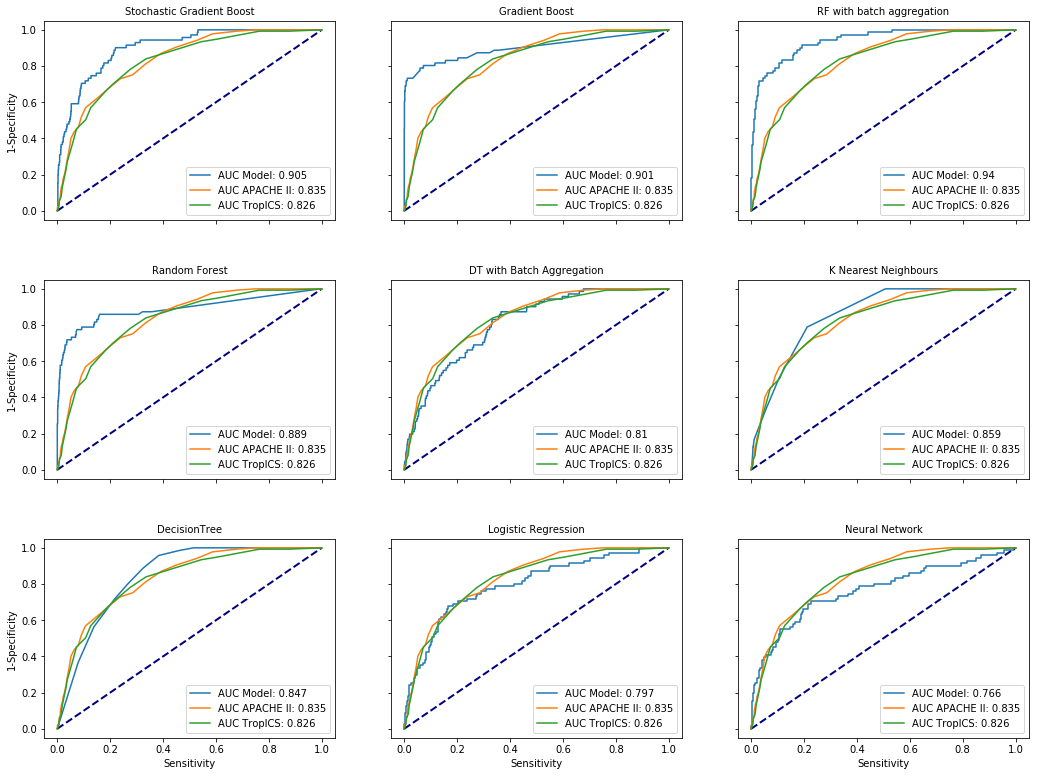

In [907]:
train_case = testPerformance(fin, targ, 'train')

## Model performance in Test Set

Arranging Models...
Evaluating performance...
Preparing dataset...
Evaluating...

Estimator: Stochastic Gradient Boost
Score in training set: 0.7926103136629452
Confidence interval for the score: [0.711 - 0.871]
Optimal threshold in training set is: 0.059
Preparing dataset...
Evaluating...

Estimator: Gradient Boost
Score in training set: 0.7883306751727804
Confidence interval for the score: [0.710 - 0.866]
Optimal threshold in training set is: 0.024
Preparing dataset...
Evaluating...

Estimator: RF with batch aggregation
Score in training set: 0.7865762892078682
Confidence interval for the score: [0.700 - 0.868]
Optimal threshold in training set is: 0.064
Preparing dataset...
Evaluating...

Estimator: Random Forest
Score in training set: 0.7766879319510898
Confidence interval for the score: [0.693 - 0.858]
Optimal threshold in training set is: 0.066
Preparing dataset...
Evaluating...

Estimator: DT with Batch Aggregation
Score in training set: 0.7964380648591174
Confidence interval fo

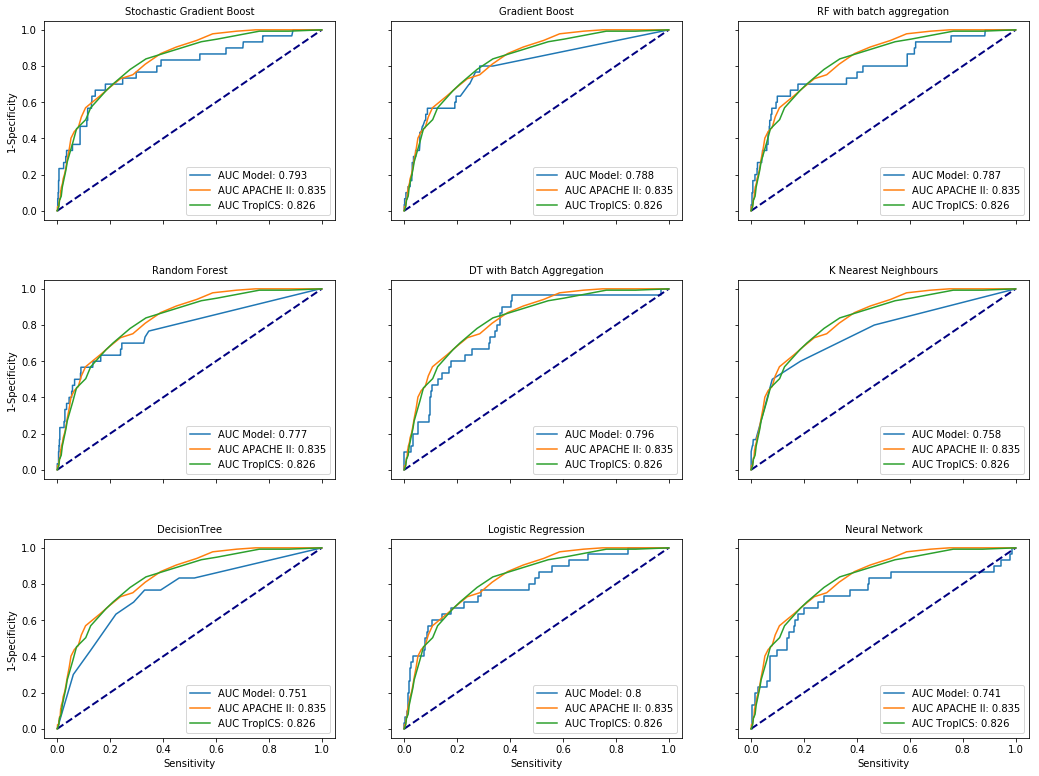

In [908]:
test_case = testPerformance(fin, targ, 'test')

## Model performance in Hold out Set

In [909]:
fin_h = holdout3_unscaled.drop('Survival', axis=1)
targ_h = holdout3_unscaled['Survival']

Arranging Models...
Evaluating performance...
Preparing dataset...
Evaluating...

Estimator: Stochastic Gradient Boost
Score in training set: 0.7544054906325357
Confidence interval for the score: [0.687 - 0.819]
Optimal threshold in training set is: 0.053
Preparing dataset...
Evaluating...

Estimator: Gradient Boost
Score in training set: 0.7917594138378778
Confidence interval for the score: [0.735 - 0.847]
Optimal threshold in training set is: 0.024
Preparing dataset...
Evaluating...

Estimator: RF with batch aggregation
Score in training set: 0.8241977369690224
Confidence interval for the score: [0.777 - 0.869]
Optimal threshold in training set is: 0.027
Preparing dataset...
Evaluating...

Estimator: Random Forest
Score in training set: 0.8051150064923019
Confidence interval for the score: [0.745 - 0.858]
Optimal threshold in training set is: 0.028
Preparing dataset...
Evaluating...

Estimator: DT with Batch Aggregation
Score in training set: 0.8113058801706547
Confidence interval fo

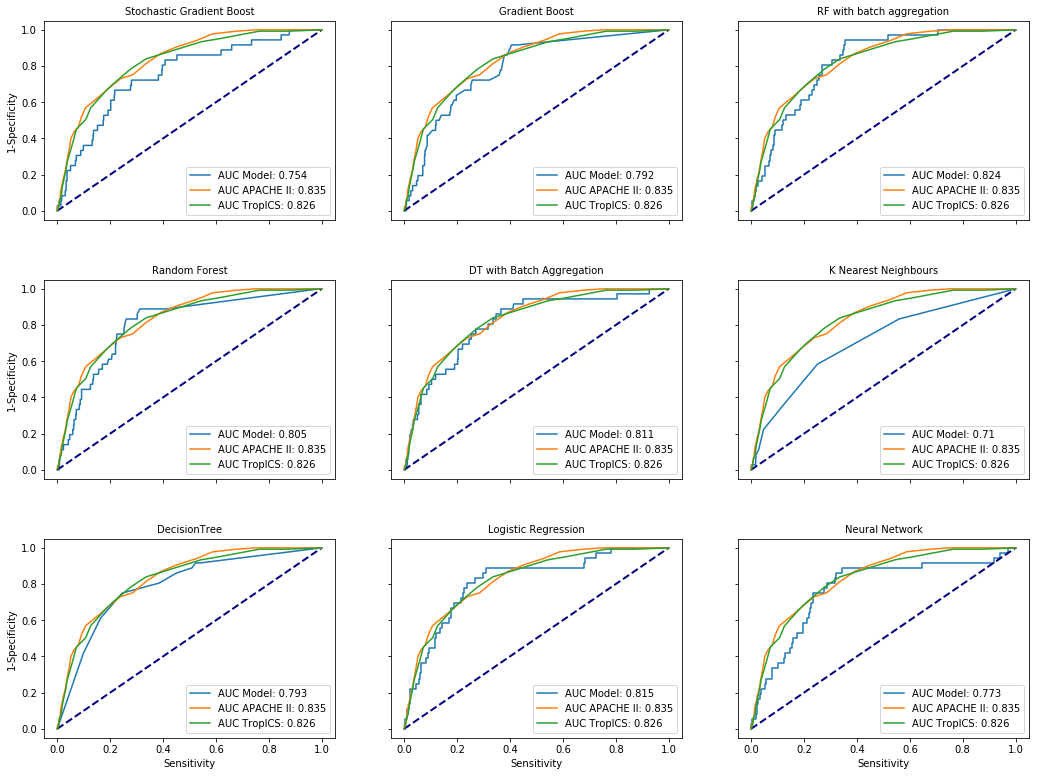

In [910]:
holdout_case = testPerformance(fin_h, targ_h, 'holdout')

In [911]:
import copy
hold = copy.deepcopy(holdout3_unscaled)

Arranging Models...
Evaluating performance...
Preparing dataset...
Evaluating...

Estimator: Stochastic Gradient Boost
12.752763284503356
0.0017012676280132588
[ 2  3  7 24] [ 5.98896875  6.28240003  7.88552628 13.89655842]
Preparing dataset...
Evaluating...

Estimator: Gradient Boost
9.45751533412262
0.008837443269601897
[ 1  1 10 24] [ 4.16497512  4.165597    5.22615303 24.39654532]
Preparing dataset...
Evaluating...

Estimator: RF with batch aggregation
11.895402742519464
0.0026118372678265445
[ 0  2 11 23] [ 4.24343517  4.43162155  5.66830775 19.11206187]
Preparing dataset...
Evaluating...

Estimator: Random Forest
6.517054120701985
0.03844498347430503
[ 3  1  7 25] [ 4.80378894  4.80833282  5.41168097 18.98022544]
Preparing dataset...
Evaluating...

Estimator: DT with Batch Aggregation
13.436087882269804
0.0012089005834411415
[ 2  0  9 25] [ 3.48990557  6.56722167 10.81997683 16.02440222]
Preparing dataset...
Evaluating...

Estimator: K Nearest Neighbours
17.67158958282289
0.00014

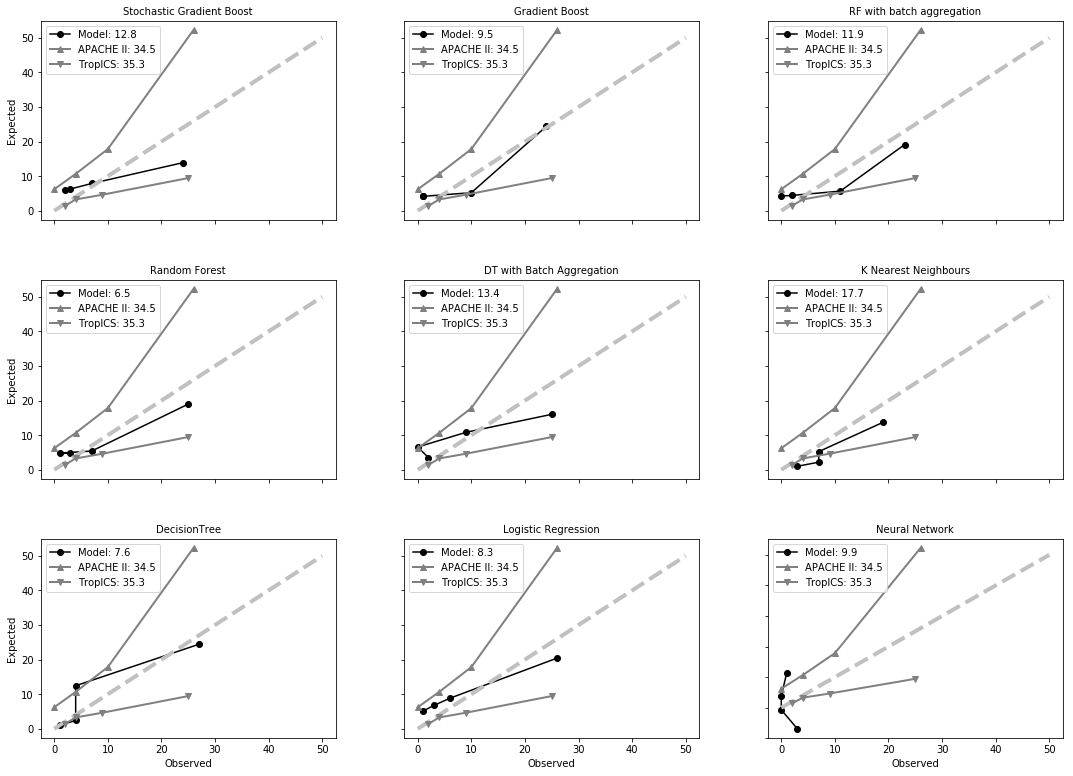

In [912]:
plotHoslem(hold)

In [39]:
tot_fin = pd.concat((df_train_unscaled, holdout3_unscaled), axis=0)

## Baseline Characteristics

In [108]:
# Train and test dataframes
X = df_train_unscaled.drop('Survival', axis=1)
y = df_train_unscaled['Survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=62)

In [ ]:
# Holdout dataframe
holdout3_unscaled

In [299]:
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    string = str(round(m, 1)) + ' (' + str(round(m-h, 1)) + '-' + str(round(m+h, 1)) +')'
    return string

In [298]:
def median_iqr(data, quartile=50):
    a = np.array(data)
    n = len(a)
    q75, q25 = np.percentile(data, [(50+(quartile/2)) ,(50-(quartile/2))])
    median = np.median(data)
    string = str(round(median, 1)) + ' (' + str(round(q25, 1)) + '-' + str(round(q75, 1)) +')'
    return string

In [484]:
def getSummary(df, y, name):
    count_cols = list(df.columns[[1, 2]])
    num_cols = list(X.columns)
    del num_cols[1:3]
    count = pd.DataFrame([len(df)], ['Count'])
    deaths = pd.DataFrame([(Counter(y)[1])], ['Deaths'])
    counts = df[count_cols].apply(lambda col: Counter(col), axis=0)
    gender = pd.DataFrame(counts.iloc[:,0].dropna())
    gender.columns = [0]
    sur = pd.DataFrame(counts.iloc[:,1].dropna())
    sur.columns = [0]
    medians = pd.DataFrame(df[num_cols].apply(lambda col: mean_confidence_interval(col), axis=0))
    all_pats = pd.concat((count, deaths, gender, sur, medians), axis=0)
    all_pats.columns = [name]
    return all_pats

In [485]:
def baseline_Table(X, y, holdout_df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=62)
    total = getSummary(X, y, 'Total')
    train = getSummary(X_train, y_train, 'Train')
    test = getSummary(X_test, y_test, 'Test')
    holdout = getSummary(holdout_df.drop('Survival', axis=1), holdout_df['Survival'], 'Holdout')
    baseline_table = pd.concat((train, test, total, holdout), axis=1)
    return baseline_table

In [486]:
baseline_Table(X, y, holdout3_unscaled)

,Train,Test,Total,Holdout
Count,1530,657,2187,635
Deaths,71,30,101,36
Female,698,282,980,279
Male,832,375,1207,356
Elective surgery,480,214,694,118
Emergency surgery,12,5,17,5
Non-Operative,1038,438,1476,512
Age,51.3 (50.4-52.2),51.3 (50.0-52.6),51.3 (50.6-52.1),53.5 (52.1-55.0)
GCS,13.3 (13.1-13.4),13.4 (13.2-13.7),13.3 (13.2-13.4),13.1 (12.9-13.4)
Temparature,98.6 (98.5-98.6),98.5 (98.5-98.6),98.6 (98.5-98.6),98.6 (98.5-98.6)


## AUROCs

In [374]:
def getROCString(case, case_type):
    score = (round(case.get(case_type)[1].get('score'), 3))
    lower = (round(case.get(case_type)[2].get('CI')[0], 3))
    upper = (round(case.get(case_type)[2].get('CI')[1], 3))
    string = str(score) + ' (' + str(lower) + '-' + str(upper) + ')'
    return string

In [375]:
def getAUROCdf(train_case, case_type):
    aurocs = []; names = []
    for case in train_case:
        aurocs.append(getROCString(case, case_type))
        names.append(case.get(case_type)[0].get('model'))
    return pd.DataFrame(aurocs, names)

In [474]:
def AUROC_Table(train_case, test_case, holdout_case):
    auroc_train = getAUROCdf(train_case, 'train')
    auroc_test = getAUROCdf(test_case, 'test')
    auroc_holdout = getAUROCdf(holdout_case, 'holdout')
    auroc_table = pd.concat((auroc_train, auroc_test, auroc_holdout), axis=1)
    auroc_table.columns = ['Train', 'Test', 'Holdout']
    return auroc_table

## Sensitivity and Specificity

In [432]:
def getSenSpecDf(train_case, case_type):
    sensitivities = []; specificities = []; names = []
    for case in train_case:
        sensitivity = round(case[case_type][3]['CR']['0']['recall']*100, 1)
        specificity = round(case[case_type][3]['CR']['1']['recall']*100, 1)
        sensitivities.append(sensitivity)
        specificities.append(specificity)
        names.append(case.get(case_type)[0].get('model'))
    ss_df = pd.concat((pd.DataFrame(sensitivities, names), pd.DataFrame(specificities, names)), axis=1)
    ss_df.columns = ['Sensitivity {}'.format(case_type), 'Specificity {}'.format(case_type)]
    return ss_df

In [473]:
def Sensitivity_Specificity_Table(train_case, test_case, holdout_case):
    sensp_train = getSenSpecDf(train_case, 'train')
    sensp_test = getSenSpecDf(test_case, 'test')
    sensp_holdout = getSenSpecDf(holdout_case, 'holdout')
    sensp_table = pd.concat((sensp_train, sensp_test, sensp_holdout), axis=1)
    return sensp_table

# -----------------------------------------------------------------------------------------